<a href="https://colab.research.google.com/github/TTTTTTT114/Algo_Trading/blob/master/QuickStockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Goal

What we need to implement in the first step

5 Basic Quant Strategies:
1. Mean Reversion
2. Momentum
3. Valuation
4. Sentiment
5. Seasonality

Source of Lectures and Algos:

https://www.quantopian.com/lectures

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
%matplotlib inline

# 2. Data Source

Yahoo finance

In [5]:
% pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b96baf653ce82d16a71257393bd22e35b40ee4ea2151661df2c3d1bfc35dd0a3
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [6]:
% pip install quandl
import quandl

 ** **Quandl verification key** **


 ** bv8Qp32xTuis-Tx7qjmY **

In [0]:
# Setting API
quandl.ApiConfig.api_key = "bv8Qp32xTuis-Tx7qjmY"

**Yahoo Finance Data**

In [0]:
import yfinance as yf

In [6]:
tsla = yf.download('TSLA', start='2020-01-01', end='2020-04-27')

[*********************100%***********************]  1 of 1 completed


In [7]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,424.500000,430.700012,421.709991,430.260010,430.260010,9532100
2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500
2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000
2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100
2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300


In [19]:
spy_08 = yf.download('SPY', start = '2007-01-01', end='2009-06-01')
spy_20 = yf.download('SPY', start = '2019-01-01', end='2020-05-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Fundamentals

### Hypothesis Testing

The four most common distributions for test statistics are as follows:

* The  t -distribution ( t -test)
* The standard normal distribution ( z -test)
* The chi-square ( χ2 ) distribution ( χ2 -test)
* The  F -distribution ( F -test)



eg. for a z-test:

Assume normal distribution(Be careful when applying the Central Limit Theorem, however, as many datasets in finance are fundamentally non-normal and it is not safe to apply the theorem casually or without attention to subtlety.) 

$$
Z = \frac{(x - \mu)}{\sigma / \sqrt{n}}
$$

x sample mean

mu target value

sigma sample variance

n sample size

**The following are the main steps in hypothesis testing:**

1. State the hypothesis and the alternative to the hypothesis
2. Identify the appropriate test statistic and its distribution. Ensure that any assumptions about the data are met (stationarity, normality, etc.)
3. Specify the significance level,  α 
4. From  α  and the distribution compute the 'critical value'.
5. Collect the data and calculate the test statistic
6. Compare test statistic with critical value and decide whether to accept or reject the hypothesis.

- null hypothesis H0

- alternative hypothesis H1

- confidence interval 95% (conventional sig_level: 0.1, 0.05, 0.01)

The most common type of hypothesis test is the two-tailed, "not equal to", hypothesis test, because it presents a neutral view. **The one-tailed hypothesis tests are less neutral than the "not equal to" test**, reflecting the thoughts of the tester. One-tailed tests are often used to test "hoped for" results or results that the testers have a **prior idea** about.

In [0]:
#                                 True Situation

# Decision                        H0 True                 H0 False

# Do not reject H0                Correnct Decision       Type 2 Error

# Reject H0 (Accept HA)           Type 1 Error            Correct Decision

![alt text](https://sixsigmastudyguide.com/wp-content/uploads/2014/04/z-table.jpg)

##Performance Measurement - KPIs

- Daily Return 

In [0]:
'''
Close_next_day / Close_current_day - 1

'''

In [0]:
tsla['Daily Returns'] = tsla['Adj Close'].pct_change()

In [0]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2020-01-02,424.500000,430.700012,421.709991,430.260010,430.260010,9532100,NaN
2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500,0.029633
2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000,0.019255
2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100,0.038801
2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300,0.049205


- CAGR (Conpound Annual Growth Rate)

In [0]:
'''

CAGR = (V_final/V_begin)^(1/t) - 1

V_final is the final value of the asset
V_begin is the beginning value of the asset
t is the time in years

'''

In [0]:
# def a function that calculate the CAGR
# This is a single value of CAGR
def CAGR(start, end, period):
    V_begin = start
    V_final = end
    t = period
    return (V_final/V_begin)**(1/t) - 1

In [0]:
# example 
CAGR(10000, 19000, 3)

0.23856232963017088

- Holding Period Return

Holding period return (HPR) is simply the percentage increase in the value of an investment over a given time period:


    holding period return  = end-of-period value / beginning-of-period value - 1


- Average Returns

The arithmetic mean return is the simple average of a series of periodic rate of return vary from period to period.

    arithmetic mean return = (R1 + R2 + R3 + ... + Rn) / n

where Rn is the return over different period of time

The geometric mean return is a compound annual rate.

    geometric mean return  = root of n((1 + R1) * (1 + R2) * ... * (1 + Rn)) - 1

- RSI (Relative Strength Index) 

The RSI is a popular momentum oscillator developed in 1978.

The RSI shows **bullish** and **bearish** price momentum, and it is often plotted beneath the graph of an asset's price.

An asset is usually considered overbought when the RSI is **above 70%** and oversold when it is **below 30%**.

The relative strength index (RSI) is computed with a two-part calculation that starts with the following formula:

$$
RSI = 100 - ( \frac{100}{1 + \frac{AverageGain}{AverageLoss}})
$$

The average gain or loss used in the calculation is the **average percentage gain or loss during a look-back period**. The formula uses a positive value for the average loss.

The standard is to use **14 periods** to calculate the initial RSI value. For example, imagine the market closed higher seven out of the past 14 days with an average gain of 1%. The remaining seven days all closed lower with an average loss of -0.8%. The calculation for the first part of the RSI would look like the following expanded calculation:

![EXAMPLE](https://tinyurl.com/ycktvv23) [link text](https://tinyurl.com/ycktvv23)

# Risk Metrics and Volatility Measurement

- Variance (Standard Deviation) of Returns for an Individeal Security

In finance, the variance and standard deviation of returns are common measures of investment risk. Both of thjese are measures of the variability of a distribution of returns about its mean and expected value.


$$
\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}
$$

- Covariance and Correlation of Returns for Two Securities

Covariance measures the extent to which two variables move together over time. A positive covariance means that the variables tend to move together. A covariance of zero means there is no linear relationship between the two variables.

$$
cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}
$$

The covariance of the returns of two securities can be standardized by divding by the product of the standard deviations of the two securities. This standardized measure of co-movement is called **correlation** and is computed as:

$$
\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}
$$

# Trading Alorithm
### Pairs Trading
Pairs trading is a form of mean reversion that has a distinct advantage of always being hedged against market movements. It is generally a high alpha strategy when backed up by some rigorous statistics. 


### Cointegration and Mean Reversion

The idea behind cointegration is that even if the prices of two different assets both follow random walks, it is still possible that a linear combination of them is not a random walk. 

In [16]:
# TSLA stock price
# start 2019-01-01
# end 2020-05-01
tsla = yf.download('TSLA', start='2018-01-01', end='2020-05-01')

[*********************100%***********************]  1 of 1 completed


In [17]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,312.000000,322.109985,311.000000,320.529999,320.529999,4352200
2018-01-03,321.000000,325.250000,315.549988,317.250000,317.250000,4521500
2018-01-04,312.869995,318.549988,305.679993,314.619995,314.619995,9946300
2018-01-05,316.619995,317.239990,312.000000,316.579987,316.579987,4591200
2018-01-08,316.000000,337.019989,315.500000,336.410004,336.410004,9859400


In [18]:
spy = yf.download('SPY', start='2018-01-01', end='2020-05-01')

[*********************100%***********************]  1 of 1 completed


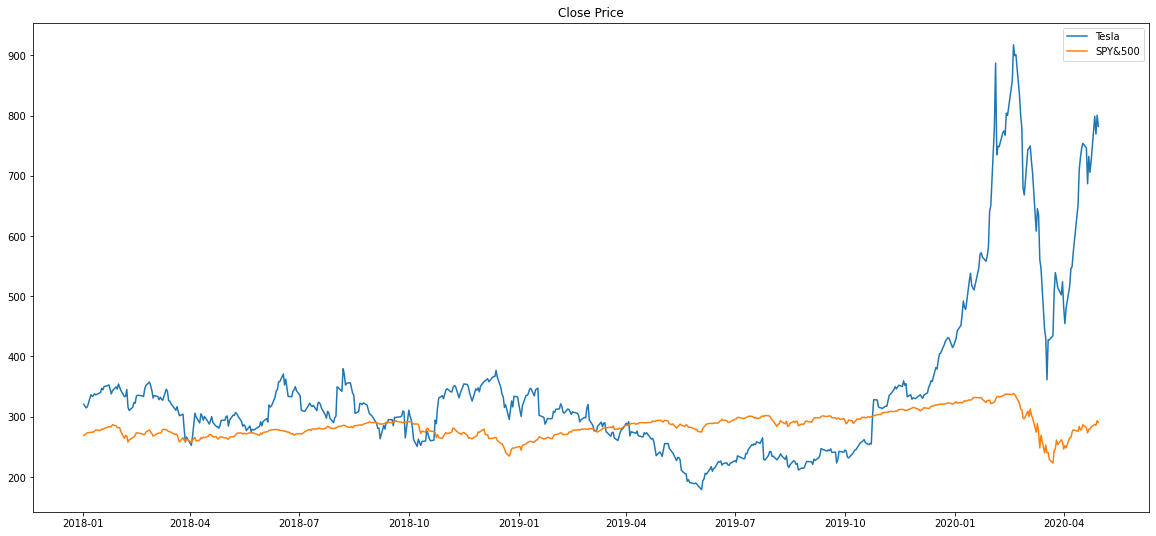

In [19]:
fig,ax = plt.subplots(figsize = (20,9))

ax.plot(tsla['Close'], label = 'Tesla')
ax.plot(spy['Close'], label = 'SPY&500')

ax.set_title('Close Price')
plt.legend();